In [1]:
import numpy as np

### Read the csv file using genfromtxt

# https://data.gov.sg/dataset/resale-flat-prices
filename = "Data/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv"
data1_1 = np.genfromtxt(filename, dtype=['U50', 'U50', 'U50', 'U50', 'U50', 'U50', 'f8', 'U50', 'i8', 'U50', 'i8'], delimiter=',', names=True)

# https://data.gov.sg/dataset/resale-flat-prices
filename = "Data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
data1_2 = np.genfromtxt(filename, dtype=['U50', 'U50', 'U50', 'U50', 'U50', 'U50', 'f8', 'U50', 'i8', 'U50', 'i8'], delimiter=',', names=True)

data1 = np.concatenate((data1_1, data1_2), axis=0)

# https://data.gov.sg/dataset/sample-household-survey-hdb-resident-population-by-geographical-distribution
filename = "Data/hdb-resident-population-by-geographical-distribution.csv"
data2 = np.genfromtxt(filename, dtype=['i8', 'U50', 'i8'], delimiter=',', names=True)

# https://data.gov.sg/dataset/hdb-property-information
filename = "Data/hdb-property-information.csv"
data3 = np.genfromtxt(filename, dtype=['U50','U50', 'i8','i8','U50', 'U50', 'U50', 'U50', 'U50', 'U50', 'U50', 'i8'], delimiter=',', names=True)


In [2]:
from collections import Counter

# Storing all the towns into an array
data_towns = data1['town']
towns = np.unique(data_towns)

# loop through the townsArray
townNum = len(towns)

# get all the flat types in data1
flatType = data1['flat_type']
# check for the flat type that has been repeated the most amount of times and store it in mostType
mostType = (Counter(flatType.flat).most_common(1))[0][0] 

averageRates = np.zeros(townNum)
types = []
ageArray = []
totalRates = []
totalArea = []

for i in range(townNum):
    
    townRates = []
    townArea = []
    
    # get the records of the current town
    keyword = towns[i]
    town_record = data1[data1['town'] == keyword]
    
    leaseYear = town_record['lease_commence_date']
    thisYear = np.full((1, len(leaseYear)), 2022)
    age = thisYear - leaseYear
    averageAge = age.mean()
    ageArray.append(averageAge)
    
    # get the flat type of all records in that town and store in typeArray
    typeArray = town_record['flat_type']
    # Get the flat type that has been listed the most amount of times and store in commonType
    commonType = (Counter(flatType.flat).most_common(1))[0][0]
    # add the common flat type to types array
    types.append(commonType)

    # get the resale price of all records in that town and store in priceArray
    priceArray = town_record['resale_price']
    
    for k in range(len(priceArray)):
        townRates.append(priceArray[k])
    
    totalRates.append(townRates)
    # calculate the total resale price and store in price
    price = priceArray.sum()
    
    # get the floor area for all records in that town and store in areaArray
    areaArray = town_record['floor_area_sqm']
    
    for l in range(len(areaArray)):
        townArea.append(areaArray[l])
        
    totalArea.append(townArea)
    # calculate the total resale price and store in area
    area = areaArray.sum()
    
    # calculate the average price per area of that town and store in pricePerSqm 
    pricePerSqm = price / area
    
    # store the average in averageRates with the same index as the town's index in towns array
    averageRates[i] = pricePerSqm

# calculate the average rates for all towns and store in totalAverage 
totalAverage = averageRates.mean()

# find the highest rate among all the towns and store it in highestRate
highestRate = averageRates.max()
# get the position and dtype of the value with the highest rate and store in maxRate
maxRate = np.where(averageRates == highestRate)
# get the index of the value with the highest rate and store in maxIndex
maxIndex = maxRate[0]
# get the town with the highest rate and store in highestTown
highestTown = towns[maxIndex]

# find the lowest rate among all the towns and store it in lowestRate
lowestRate = averageRates.min()
# get the position and dtype of the value with the lowest rate and store in minRate
minRate = np.where(averageRates == lowestRate)
# get the index of the value with the lowest rate and store in minIndex
minIndex = minRate[0]
# ge the town with the lowest rate and store it in lowestTown
lowestTown = towns[minIndex]



In [3]:
# loop through townsArray 
for i in range(townNum):
    # store the current town's name in townName
    townName = towns[i]
    # store the current town's average rate in townAverage
    townAverage = averageRates[i]
    # store the current town's average lease age in averageAge
    averageAge = ageArray[i]
    
    flatType = types[i]
    # print to display findings
    print(f'The average rate of houses for {townName} is ${townAverage:.2f}/sqm\nThe type of flat most bought is {flatType}')
    print(f'The average age of the houses are {averageAge:.0f}\n')

print("------------------------------------------------------------------------------------")
print(f'The average rate of houses in Singapore is ${totalAverage:.2f}/sqm\n')
print(f'The town with the highest rate is {highestTown[0]} with a rate of ${highestRate:.2f}/sqm\n')
print(f'The town with the lowest rate is {lowestTown[0]} with a rate of ${lowestRate:.2f}/sqm\n')
print(f'The type of flat mostly bought is {mostType}')
    

The average rate of houses for ANG MO KIO is $4967.09/sqm
The type of flat most bought is 4 ROOM
The average age of the houses are 38

The average rate of houses for BEDOK is $4758.47/sqm
The type of flat most bought is 4 ROOM
The average age of the houses are 37

The average rate of houses for BISHAN is $5969.10/sqm
The type of flat most bought is 4 ROOM
The average age of the houses are 32

The average rate of houses for BUKIT BATOK is $4246.51/sqm
The type of flat most bought is 4 ROOM
The average age of the houses are 33

The average rate of houses for BUKIT MERAH is $6584.70/sqm
The type of flat most bought is 4 ROOM
The average age of the houses are 31

The average rate of houses for BUKIT PANJANG is $4313.27/sqm
The type of flat most bought is 4 ROOM
The average age of the houses are 22

The average rate of houses for BUKIT TIMAH is $6515.33/sqm
The type of flat most bought is 4 ROOM
The average age of the houses are 39

The average rate of houses for CENTRAL AREA is $7917.98/sq

In [4]:
# Storing all the years into an array
data_years = data2['shs_year']
allYears = np.unique(data_years)

yearNum = len(allYears)

highestPopArray = []
lowestPopArray = []

highestEstateArray = []
lowestEstateArray = []

AllPopulations = []

for i in range(yearNum):
    # get the records of the current year
    keyword = allYears[i]
    year_record = data2[data2['shs_year'] == keyword]
    
    populationArray = year_record['number']
    
    estateArray = year_record['town_estate']
    
    # find the highest population among all the towns and store it in highestPop
    highestPop = populationArray.max()
    # get the position and dtype of the value with the highest population and store in maxPop
    maxPop = np.where(populationArray == highestPop)
    # get the index of the value with the highest population and store in maxIndex
    maxIndex = maxPop[0]
    # get the town with the highest population and store in highestTown
    highestEstate = estateArray[maxIndex]
    
    highestEstateArray.append(highestEstate)
    highestPopArray.append(highestPop)
    
    # find the lowest population among all the towns and store it in lowestPop
    lowestPop = populationArray.min()
    # get the position and dtype of the value with the lowest population and store in minPop
    minPop = np.where(populationArray == lowestPop)
    # get the index of the value with the lowest population and store in minIndex
    minIndex = minPop[0]
    # get the town with the lowest population and store in lowestTown
    lowestEstate = estateArray[minIndex]
    
    lowestEstateArray.append(lowestEstate)
    lowestPopArray.append(lowestPop)
    

In [5]:
for i in range(yearNum):
    highEstate = highestEstateArray[i]
    lowEstate = lowestEstateArray[i]
    
    highPop = highestPopArray[i]
    lowPop = lowestPopArray[i]
    
    print(f'In the year {allYears[i]},')
    print(f'The town with the highest population is {highEstate[0]} with a population of {highPop}')
    print(f'The town with the lowest population is {lowEstate[0]} with a population of {lowPop}\n')
   

In the year 2003,
The town with the highest population is Tampines with a population of 228722
The town with the lowest population is Bukit Timah with a population of 8794

In the year 2008,
The town with the highest population is Jurong_west with a population of 233920
The town with the lowest population is Bukit Timah with a population of 8402

In the year 2013,
The town with the highest population is Jurong_west with a population of 242395
The town with the lowest population is Bukit Timah with a population of 7830

In the year 2018,
The town with the highest population is Woodlands with a population of 227600
The town with the lowest population is Bukit Timah with a population of 7600



In [6]:
town_acr = {'AMK' : 'ANG MO KIO', 'BB' : 'BUKIT BATOK', 'BD' : 'BEDOK', 'BH' : 'BISHAN', 'BM' : 'BUKIT MERAH', 'BP' : 'BUKIT PANJANG', 'BT' : 'BUKIT TIMAH', 'CCK' : 'CHOA CHU KANG', 'CL' : 'CLEMENTI', 'CT': 'CENTRAL AREA', 'GL' : 'GEYLANG', 'HG' : 'HOUGANG', 'JE' : 'JURONG EAST', 'JW' : 'JURONG WEST', 'KWN' : 'KALLANG/WHAMPOA', 'MP' : 'MARINE PARADE', 'PG' : 'PUNGGOL', 'PRC' : 'PASIR RIS', 'QT' : 'QUEENSTOWN', 'SB' :'SEMBAWANG', 'SGN': 'SERANGOON','SK' : 'SENGKANG', 'TAP' : 'TAMPINES', 'TG' : 'TENGAH', 'TP' : 'TOA PAYOH', 'WL': 'WOODLANDS', 'YS' : 'YISHUN' }

# Storing all the towns into an array
contract_towns = data3['bldg_contract_town']
contractTowns = np.unique(contract_towns)

totalTowns = len(contractTowns)

residentialAreaArray = []
commercialAreaArray = []
marketHawkersArray = []
dwellingUnitsArray = []

for i in range(totalTowns):
    # get the records of the current year
    keyword = contractTowns[i]
    town_property_record = data3[data3['bldg_contract_town'] == keyword]
    
    exists = 'Y'
    
    residential_buildings = town_property_record[town_property_record['residential'] == exists]
    residentialAreaArray.append(len(residential_buildings))
    
    commercialBuildings = town_property_record[town_property_record['commercial'] == exists]
    commercialAreaArray.append(len(commercialBuildings))
    
    marketHawkers = town_property_record[town_property_record['market_hawker'] == exists]
    marketHawkersArray.append(len(marketHawkers))
    
    dwellingUnits = town_property_record['total_dwelling_units'].sum()
    dwellingUnitsArray.append(dwellingUnits)
    
# find the highest residential building among all the towns and store it in highestRes
highestRes = max(residentialAreaArray)
# get the index of the value with the highest residential buildings and store in maxRes
maxRes = residentialAreaArray.index(highestRes)
# get the town with the highest residential buildings and store in highestResTown
highestResTown =  town_acr[contractTowns[maxRes]]

# find the highest commercial building among all the towns and store it in highestCom
highestCom = max(commercialAreaArray)
# get the index of the value with the highest commercial buildings and store in maxRes
maxCom = commercialAreaArray.index(highestCom)
# get the town with the highest commercial buildings and store in highestComTown
highestComTown =  town_acr[contractTowns[maxCom]]

# find the highest market/hawkers among all the towns and store it in highestMar
highestMar = max(marketHawkersArray)
# get the index of the value with the highest market/hawkerss and store in maxMar
maxMar = marketHawkersArray.index(highestMar)
# get the town with the highest market/hawkers and store in highestMarTown
highestMarTown =  town_acr[contractTowns[maxMar]]

# find the highest dwelling units among all the towns and store it in highestUnit
highestUnit = max(dwellingUnitsArray)
# get the index of the value with the highest dwelling units and store in maxUnit
maxUnit = dwellingUnitsArray.index(highestUnit)
# get the town with the highest dwelling units and store in highestUnitTown
highestUnitTown =  town_acr[contractTowns[maxUnit]]


# find the lowest residential building among all the towns and store it in lowestRes
lowestRes = min(residentialAreaArray)
# get the index of the value with the lowest residential buildings and store in minRes
minRes = residentialAreaArray.index(lowestRes)
# get the town with the lowest residential buildings and store in lowestResTown
lowestResTown =  town_acr[contractTowns[minRes]]

# find the lowest commercial building among all the towns and store it in lowestCom
lowestCom = min(commercialAreaArray)
# get the index of the value with the lowest commercial buildings and store in minRes
minCom = commercialAreaArray.index(lowestCom)
# get the town with the lowest commercial buildings and store in lowestComTown
lowestComTown =  town_acr[contractTowns[minCom]]

# find the lowest market/hawkers among all the towns and store it inlowestMar
lowestMar = min(marketHawkersArray)
# get the index of the value with the lowest market/hawkerss and store in minMar
minMar = marketHawkersArray.index(lowestMar)
# get the town with the lowest market/hawkers and store in lowestMarTown
lowestMarTown =  town_acr[contractTowns[minMar]]

# find the lowest dwelling units among all the towns and store it in lowestUnit
lowestUnit = min(dwellingUnitsArray)
# get the index of the value with the lowest dwelling units and store in minUnit
minUnit = dwellingUnitsArray.index(lowestUnit)
# get the town with the highest dwelling units and store in highestUnitTown
lowestUnitTown =  town_acr[contractTowns[minUnit]]


In [7]:
print(f'The town with the most residential buildings is {highestResTown} with a total of {highestRes} buildings')
print(f'The town with the least residential buildings is {lowestResTown} with a total of {lowestRes} buildings\n')
print(f'The town with the most commercial buildings is {highestComTown} with a total of {highestCom} buildings')
print(f'The town with the least commercial buildings is {lowestComTown} with a total of {lowestCom} buildings\n')
print(f'The town with the most markets or hawkers is {highestMarTown} with a total of {highestMar} buildings')
print(f'The town with the least markets or hawkers is {lowestMarTown} with a total of {lowestMar} buildings\n')
print(f'The town with the most dwelling units is {highestUnitTown} with a total of {highestUnit} buildings')
print(f'The town with the least dwelling units is {lowestUnitTown} with a total of {lowestUnit} buildings\n')

The town with the most residential buildings is TAMPINES with a total of 820 buildings
The town with the least residential buildings is BUKIT TIMAH with a total of 27 buildings

The town with the most commercial buildings is TAMPINES with a total of 186 buildings
The town with the least commercial buildings is BUKIT TIMAH with a total of 6 buildings

The town with the most markets or hawkers is BUKIT MERAH with a total of 14 buildings
The town with the least markets or hawkers is PUNGGOL with a total of 0 buildings

The town with the most dwelling units is TAMPINES with a total of 75342 buildings
The town with the least dwelling units is BUKIT TIMAH with a total of 2554 buildings



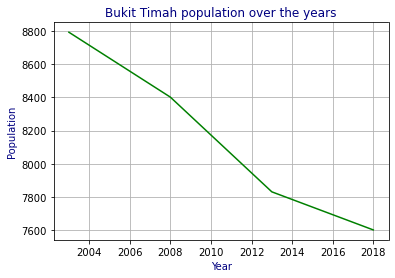

In [8]:
import matplotlib.pyplot as plt

# Line Chart
# population growth of town with the lowest population
chosenTown = lowestEstateArray[0][0]

yearArrayforX = allYears

town_record = data2[data2['town_estate'] == chosenTown]
populationArrayforY = town_record['number']

plt.plot(allYears, populationArrayforY, color = "green")

# Add title and axis names
plt.title(chosenTown + ' population over the years', color = "Navy")
plt.xlabel('Year', color = "Navy")
plt.ylabel('Population', color = "Navy")

plt.grid()

plt.show()

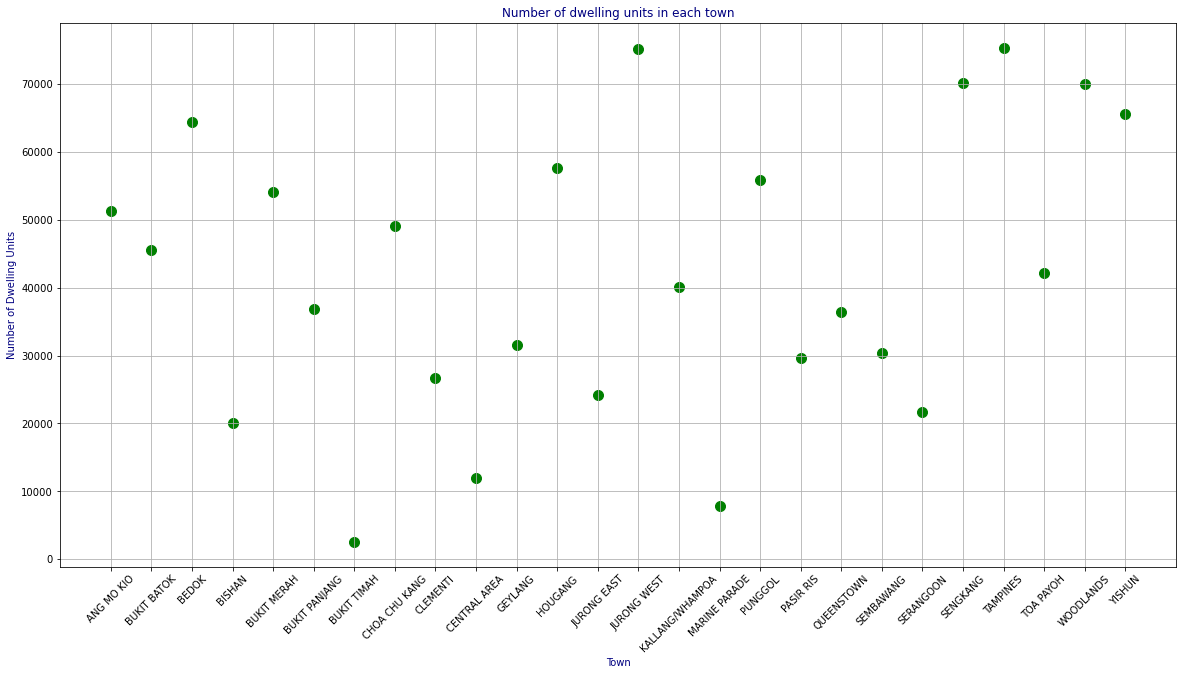

In [9]:
# ScatterPlot 
# plot the number of dwelling units in each town

townArrayForX = []
for i in range(len(contractTowns)):
    townArrayForX.append(town_acr[contractTowns[i]])
    
fig = plt.figure(figsize=(20, 10))

plt.xticks(rotation=45)
#plt.scatter(towns,ageArray, s = 100, c = 'green')
plt.scatter(townArrayForX,dwellingUnitsArray, s = 100, c = 'green')

# Add title and axis names
plt.title('Number of dwelling units in each town', color = "Navy")
plt.xlabel('Town', color = "Navy")
plt.ylabel('Number of Dwelling Units', color = "Navy")

plt.grid()

plt.show()


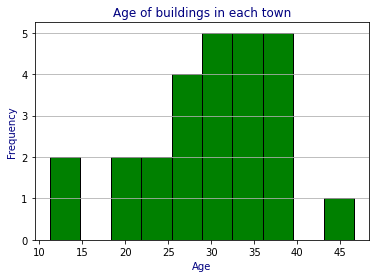

In [10]:
# histogram
# plot the average age of buildings

townArrayForX = []
for i in range(len(contractTowns)):
    townArrayForX.append(town_acr[contractTowns[i]])

plt.hist(ageArray, edgecolor = 'black', color = 'green')
# Add title and axis names
plt.title('Age of buildings in each town', color = "Navy")
plt.xlabel('Age', color = "Navy")
plt.ylabel('Frequency', color = "Navy")
plt.grid(axis = 'y')
plt.show()


C:\Users\User\AppData\Local\Temp/ipykernel_19676/348861932.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([np.array(x) for x in totalRates])
C:\Users\User\AppData\Local\Temp/ipykernel_19676/348861932.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array([np.array(x) for x in totalArea])


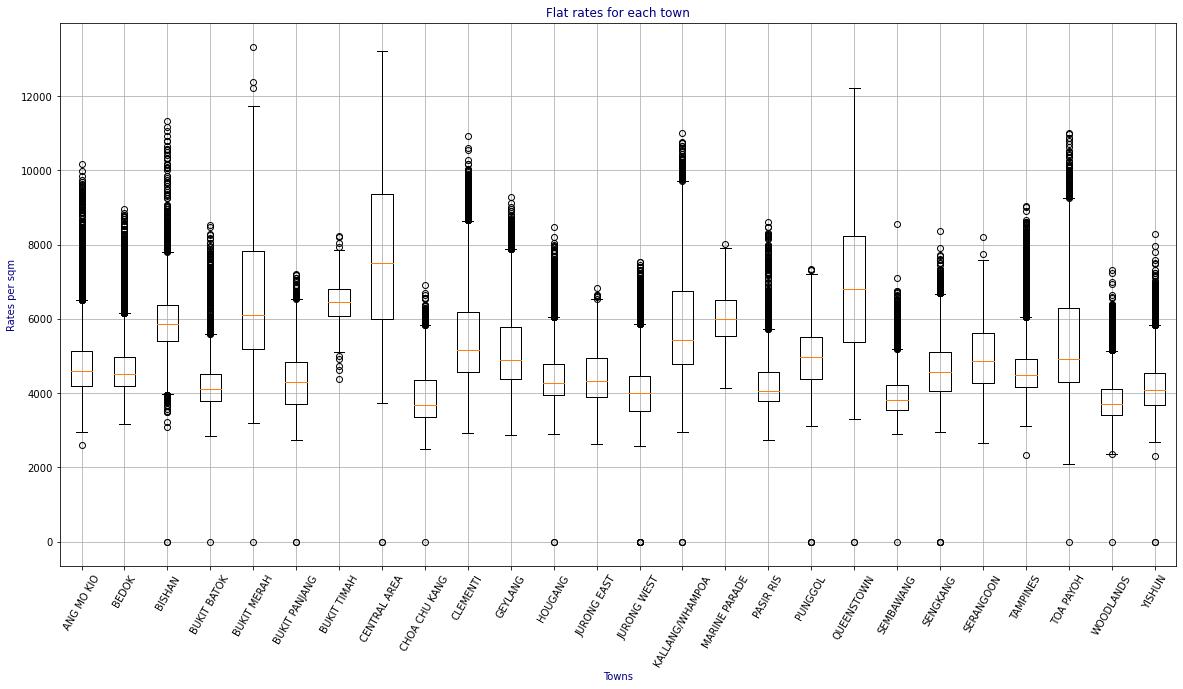

In [11]:
# box plot to show the different rates/sqm

a = np.array([np.array(x) for x in totalRates])
b = np.array([np.array(x) for x in totalArea])

totalRatesPerArea = np.divide(a,b)

fig = plt.figure(figsize=(20, 10))

plt.xticks(rotation=60)

plt.boxplot(totalRatesPerArea, labels = towns)

# Add title and axis names
plt.title('Flat rates for each town', color = "Navy")
plt.ylabel('Rates per sqm', color = "Navy")
plt.xlabel('Towns', color = "Navy")
plt.grid()
plt.show()

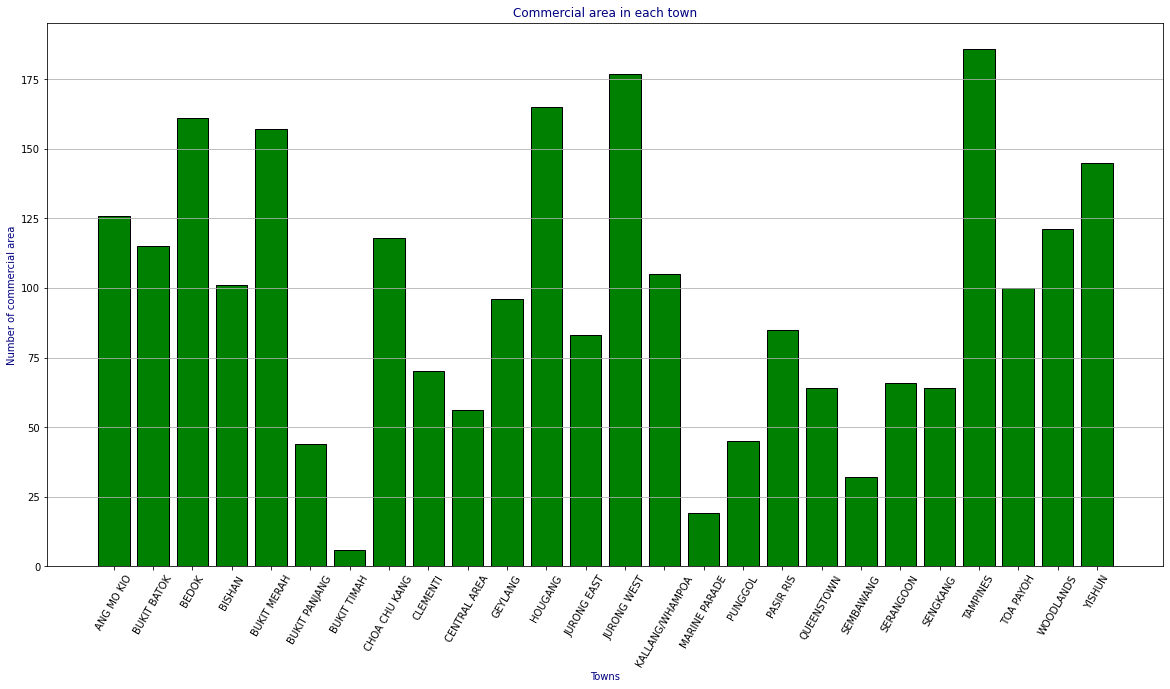

In [12]:
townArrayForX = []
for i in range(len(contractTowns)):
    townArrayForX.append(town_acr[contractTowns[i]])
    
fig = plt.figure(figsize=(20, 10))
plt.xticks(rotation=60)
plt.bar(townArrayForX,commercialAreaArray, edgecolor = 'black', color = 'green')

# Add title and axis names
plt.title('Commercial area in each town', color = "Navy")
plt.xlabel('Towns', color = "Navy")
plt.ylabel('Number of commercial area', color = "Navy")
plt.grid(axis = 'y')
plt.show()

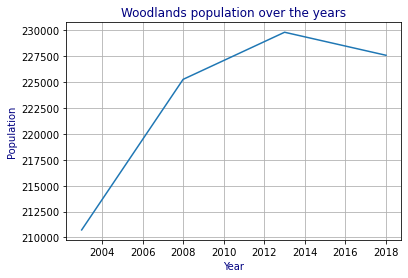

In [13]:
# Line Chart
# population growth of town with the highest price
chosenTown = highestEstateArray[3][0]

yearArrayforX = allYears

town_record = data2[data2['town_estate'] == chosenTown]
populationArrayforY = town_record['number']

plt.plot(allYears, populationArrayforY)

# Add title and axis names
plt.title(chosenTown + ' population over the years', color = "Navy")
plt.xlabel('Year', color = "Navy")
plt.ylabel('Population', color = "Navy")
plt.grid()
plt.show()

In [14]:
print("The question I had in mind was what are the factors that makes a town desirable or not desirable to live in.\nSo I chose my datasets to find the answer to my question. \nBased on my analysis of the line graph I found out that Bukit Timah has a declining population and \nhas the least population throughout the years \nSo I did more data analysis to find out why.\nI analysed the amount of dwelling units Bukit Timah has when compared to the other towns using the scatterplot and found out that it has the least amount of dwelling units. \nThe average age of houses in Bukit Timah is 39. Based on the histogram I realised that most of the houses in Singapore are aged between 26-39.\nThe age of houses in Bukit Timah is hence pretty average but it does lean more towards the older side.\nUsing the Box plot I was able to identify that the median for Bukit Timah also seems to be higher than the average $5123.05/sqm\nThe outliers are also pretty close to the price range for Bukit Timah.\nHence i can deduce that the cost of houses in Bukit Timah is generally on the pricier side when compared to the other towns.\nUsing bar chart i analysed the commercial area in Bukit Timah.\nBukit Timah has the least number of commercial area.\n\n\nThe town with the highest population in 2018 is Woodlands.\nFrom 2003 to 2013 Woodlands has an increasing population.\nFrom 2013 to 2018 Woodlands population did go down however woodlands still has the highest population in 2018\nUsing the scatter plot i can analyse that the dwelling units in woodlands seems pretty average compared to the other towns.\nThe average age of houses in Woodlands is 25. \nBased on the histogram, most of the houses in Singapore are aged between 26-39.\nSo the houses in Woodlands are quite new compared to other towns\nBased on the box plot, I can see that there are lots of outliers in woodlands.\nbut in general the houses in woodlands are cheaper compared to other towns.\nThe median for woodlands is also lesser than the average\nWoodlands has the 7th most commercial areas\n\n\nWith my analysis i have realised that people prefer towns with more commercial area, Less price and newer houses  ")

The question I had in mind was what are the factors that makes a town desirable or not desirable to live in.
So i chose my datasets to find the answer to my question. 
Based on my analysis of the line graph I found out that Bukit Timah has a declining population and 
has the least population throughout the years 
So I did more data analysis to find out why.
I analysed the amount of dwelling units Bukit Timah has when compared to the other towns using the scatterplot and found out that it has the least amount of dwelling units. 
The average age of houses in Bukit Timah is 39. Based on the histogram I realised that most of the houses in Singapore are aged between 26-39.
The age of houses in Bukit Timah is hence pretty average but it does lean more towards the older side.
Using the Box plot I was able to identify that the median for Bukit Timah also seems to be higher than the average $5123.05/sqm
The outliers are also pretty close to the price range for Bukit Timah.
Hence i can deduce th